# Objective: 
## Predict whether a passenger survived the Titanic disaster (binary classification: Survived = 1 or 0 )

In [2]:
import pandas as pd

train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

test_passenger_ids = test_df['PassengerId']

# EDA

In [3]:
print(train_df.head())
train_df.info()
train_df.describe().T

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


#### missing values in Age (177), Cabin (687), Embarked (2)
#### Survived mean ~0.38 (38% survived), Age mean ~29.79 (skewed), Fare mean ~32.20 (highly skewed ).

In [5]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [11]:
print(train_df.dtypes)
print("\n")
print(test_df.dtypes)

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


#### Types are consistent

### Check for Missing Values

In [13]:
print("Train missing values:\n", train_df.isnull().sum())
print("Test missing values:\n", test_df.isnull().sum())

Train missing values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
Test missing values:
 PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


### Identify Outliers

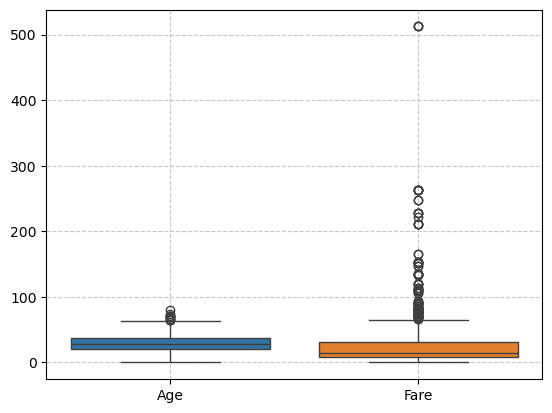

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot for numerical features in train
sns.boxplot(data=train_df[['Age', 'Fare']])

plt.grid(True, which='major', linestyle='--', alpha=0.7)

plt.show()

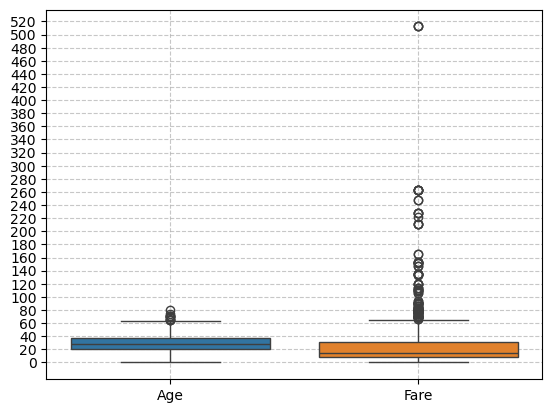

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Boxplot for numerical features in train
sns.boxplot(data=train_df[['Age', 'Fare']])

# Set y-ticks with interval of 10 (adjust based on max value)
max_val = max(train_df['Age'].max(), train_df['Fare'].max())
plt.yticks(np.arange(0, max_val + 20, 20))

plt.grid(True,  linestyle='--', alpha=0.7)
 

plt.show()


### Visualize Distributions

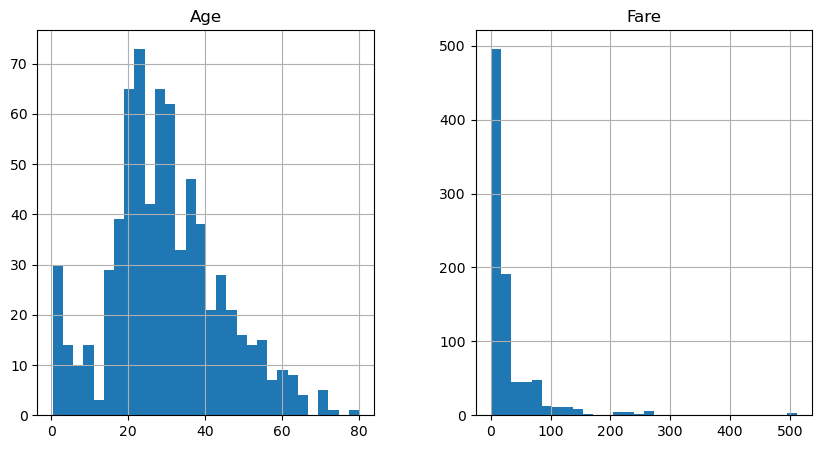

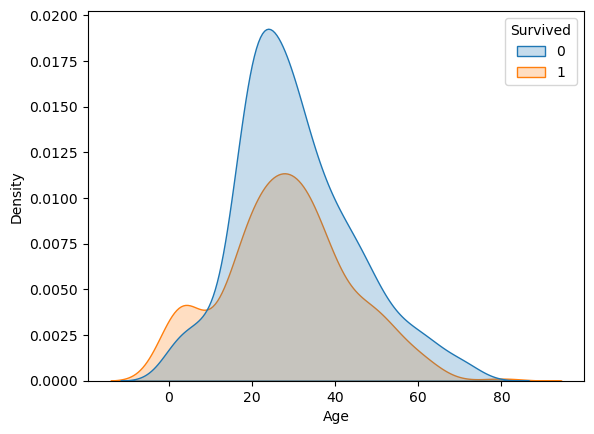

In [29]:
# Histogram for numerical features
train_df[['Age', 'Fare']].hist(bins=30, figsize=(10, 5))
plt.show()

# KDE plot for Age by Survived
sns.kdeplot(data=train_df, x='Age', hue='Survived', fill=True)
plt.show()

#### Age histogram: Peaks at 20–30, slightly normal.
#### Fare histogram: Right-skewed, most < $50.
#### Age KDE: Survivors and non-survivors have similar distributions, but children (<10) show higher survival.

### corelation Analysis

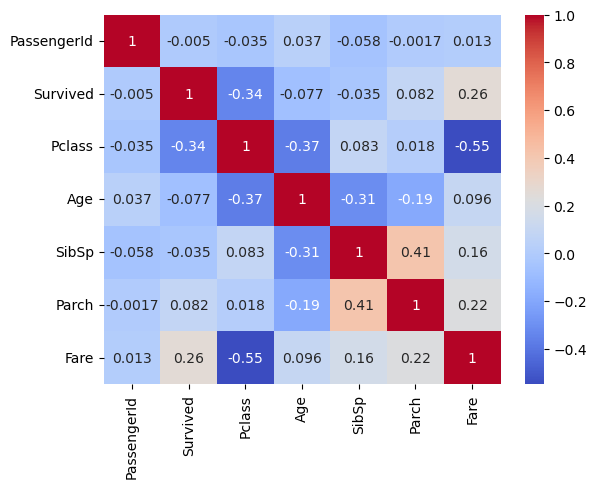

In [30]:
# Correlation matrix for train
corr = train_df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

#### Survived correlates negatively with Pclass (~ -0.3) and positively with Fare (~0.2).

### Explore Categorical Variables

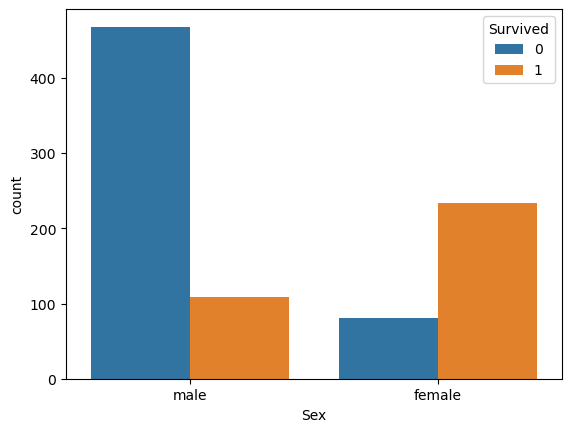

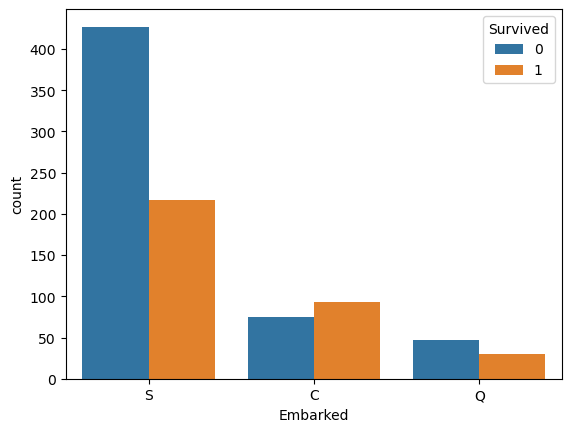

Survived         0         1
Pclass                      
1         0.370370  0.629630
2         0.527174  0.472826
3         0.757637  0.242363


In [31]:
# Count plots
sns.countplot(data=train_df, x='Sex', hue='Survived')
plt.show()
sns.countplot(data=train_df, x='Embarked', hue='Survived')
plt.show()

# Crosstab for Pclass
print(pd.crosstab(train_df['Pclass'], train_df['Survived'], normalize='index'))

### Explore Relationships

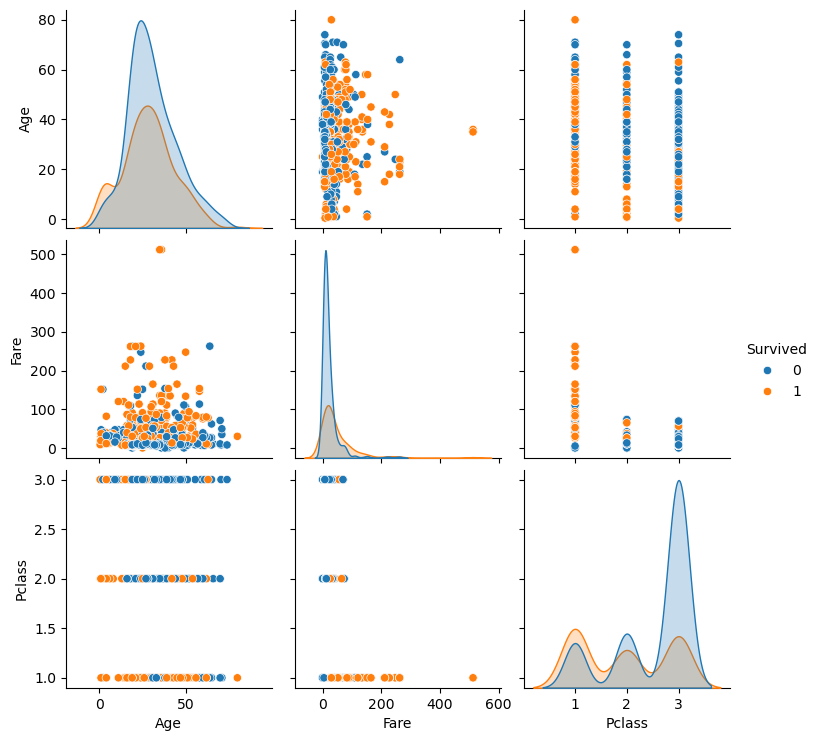

Pclass  Survived
1       0           64.684007
        1           95.608029
2       0           19.412328
        1           22.055700
3       0           13.669364
        1           13.694887
Name: Fare, dtype: float64


In [32]:
# Pairplot
sns.pairplot(train_df[['Age', 'Fare', 'Pclass', 'Survived']], hue='Survived')
plt.show()

# Grouped analysis
print(train_df.groupby(['Pclass', 'Survived'])['Fare'].mean())